In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import read_quote      as rq
import stock_functions as sf
import df_visualizations as dv
import remap_values as rv

import sys
import time

In [2]:
%matplotlib inline
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (14, 10)

colorz = [ 'white', 'red', 'blue', 'green', 'orange', 'cyan', 'olivedrab', 'darkred', 'steeleblue', 'seagreen' ]

In [3]:
inpFile = 'quotes/hes.csv'
ibm_quote = rq.readQuote( inpFile )

In [4]:
roll_nums = [3,5,10,15,20,25,30]
mom_nums  = [3,5,10,20,30]
rsi_nums  = [10,15,20,25,30]
band_nums = [3,5,10,15,20]

In [5]:
diffs = sf.generate_differentials   ( ibm_quote            )
rolls = sf.generate_rolling_close   ( ibm_quote, roll_nums )
moms  = sf.generate_momentum_close  ( ibm_quote, mom_nums  )
rsi   = sf.generate_rsi             ( ibm_quote, rsi_nums  )
bands = sf.generate_bollinger_bands ( ibm_quote, band_nums )

In [6]:
foo = ibm_quote[['close','open']].copy()
for i in roll_nums:
    foo['close_mean_'+str(i)] = rolls['close_mean_'+str(i)]
foo = foo.drop( 'open', axis=1 )
foo.head()

,close,close_mean_3,close_mean_5,close_mean_10,close_mean_15,close_mean_20,close_mean_25,close_mean_30
date,,,,,,,,
2017/07/14,43.96,43.466667,43.184,43.319,42.842667,42.6065,43.1340,43.514667
2017/07/13,43.31,43.166667,42.750,43.223,42.646000,42.5830,43.1152,43.604333
2017/07/12,43.13,42.883333,42.654,43.101,42.446000,42.6820,43.1748,43.690333
2017/07/11,43.06,42.436667,42.700,42.925,42.343333,42.8540,43.3272,43.808333
2017/07/10,42.46,42.360000,43.172,42.778,42.336667,42.9700,43.4492,43.977667


In [7]:
bar          = foo.copy()
bar['close'] = ( foo.shift(1) / foo - 1 )
for i in [3,5,10]:
    bar['close_mean_'+str(i)] = ( foo['close_mean_'+str(i)].shift(i) / foo['close_mean_'+str(i)] - 1 )    
bar = bar[['close','close_mean_3','close_mean_5','close_mean_10']]
bar = bar.replace([np.inf, -np.inf], np.nan).fillna(0)
bar.head()

,close,close_mean_3,close_mean_5,close_mean_10
date,,,,
2017/07/14,0.000000,0.000000,0.0,0.0
2017/07/13,0.015008,0.000000,0.0,0.0
2017/07/12,0.004173,0.000000,0.0,0.0
2017/07/11,0.001626,0.024271,0.0,0.0
2017/07/10,0.014131,0.019043,0.0,0.0


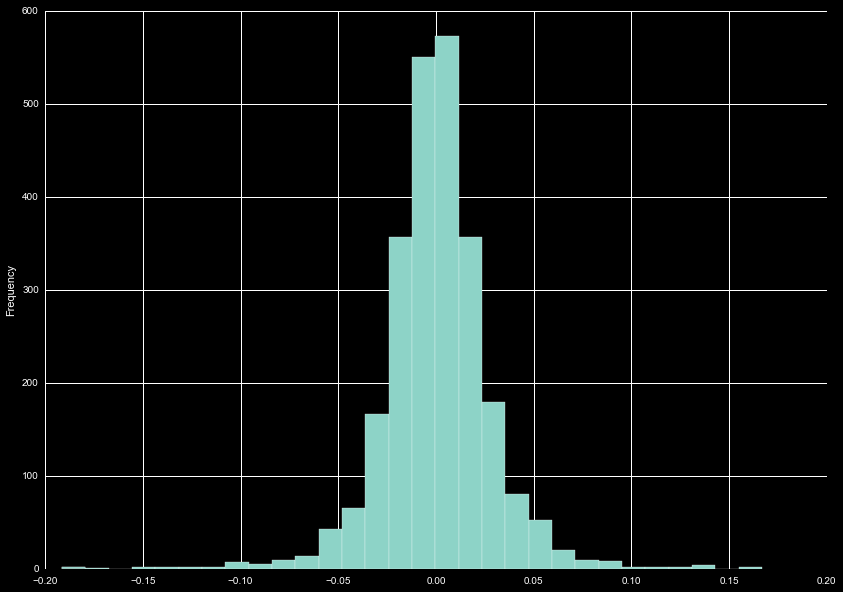

In [8]:
bar['close'].plot.hist( bins=30 )

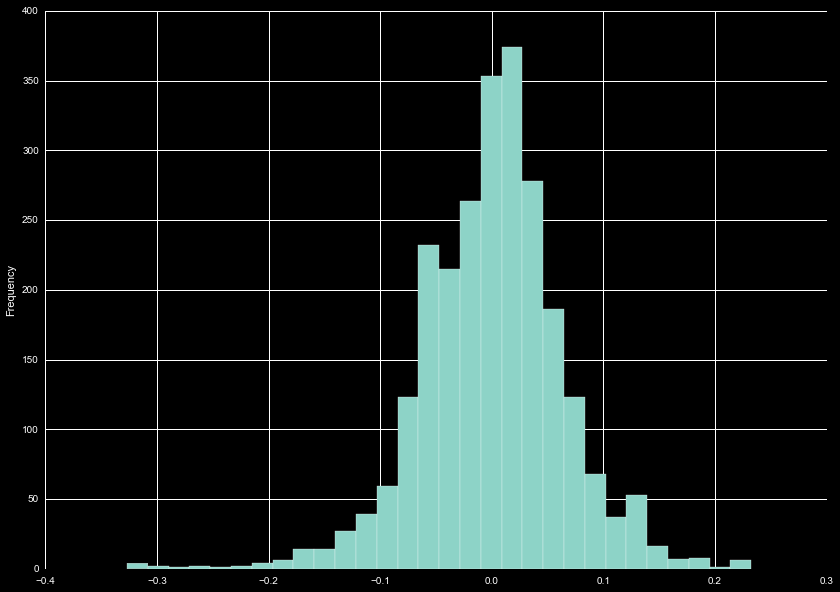

In [9]:
bar['close_mean_10'].plot.hist( bins=30 )

In [10]:
bar['close_mean_10'].describe()

count    2519.000000
mean        0.000566
std         0.063378
min        -0.326819
25%        -0.038380
50%         0.005006
75%         0.035865
max         0.232547
Name: close_mean_10, dtype: float64

/home/sean/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


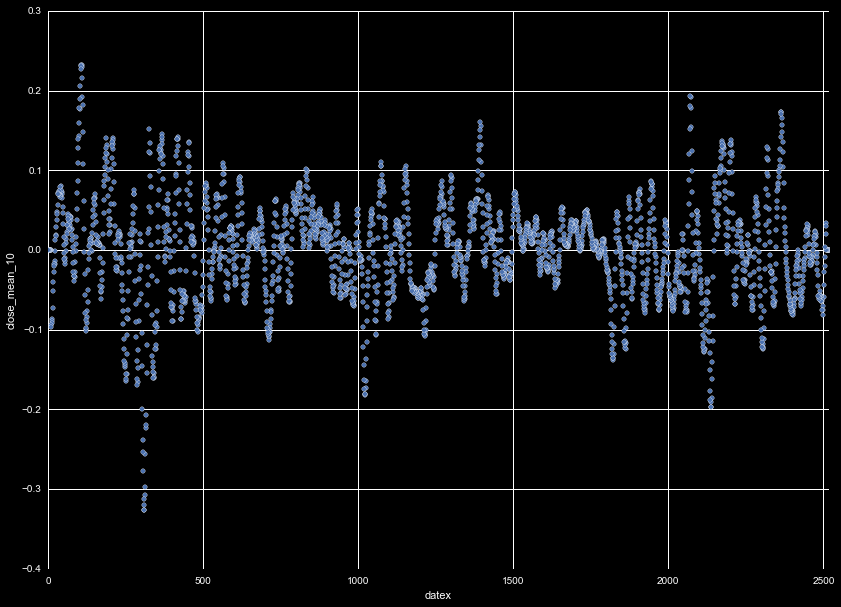

In [11]:
foobar = bar.copy()
foobar['datex'] = np.arange( bar.shape[0], 0, -1 )
foobar.plot.scatter( x='datex', 
                     y='close_mean_10', 
                     xlim=[0,bar.shape[0]] )

In [12]:
foobar = bar.join( diffs, how='inner' )

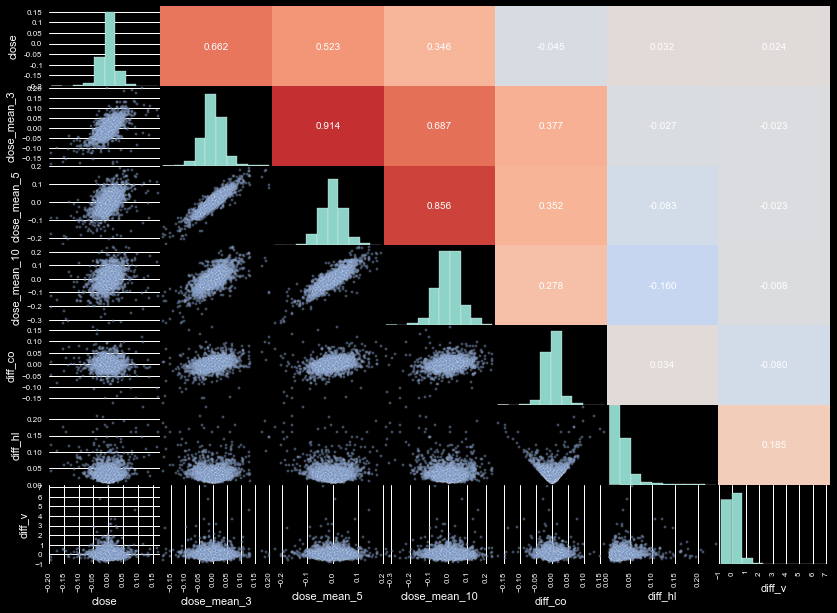

In [13]:
dv.corr_plot( foobar, corr_method = 'pearson')

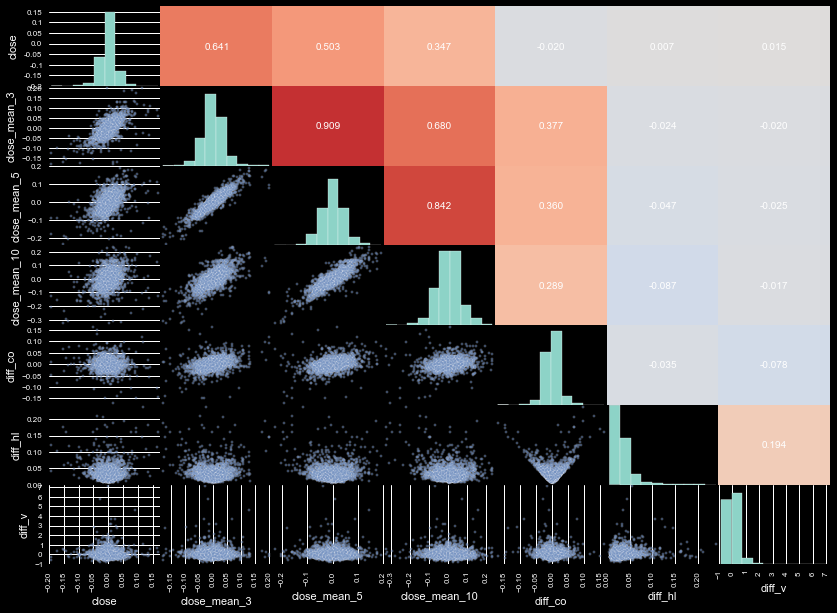

In [14]:
dv.corr_plot( foobar )

In [15]:
print diffs.corrwith( bar['close']         )
print diffs.corrwith( bar['close_mean_3']  )
print diffs.corrwith( bar['close_mean_5']  )
print diffs.corrwith( bar['close_mean_10'] )

diff_co   -0.045032
diff_hl    0.031735
diff_v     0.023617
dtype: float64
diff_co    0.376933
diff_hl   -0.026666
diff_v    -0.022672
dtype: float64
diff_co    0.352003
diff_hl   -0.083184
diff_v    -0.022589
dtype: float64
diff_co    0.277634
diff_hl   -0.159946
diff_v    -0.008120
dtype: float64


In [16]:
# Diffs appear to be useful

In [17]:
foobar = bar.join( moms, how='inner' )

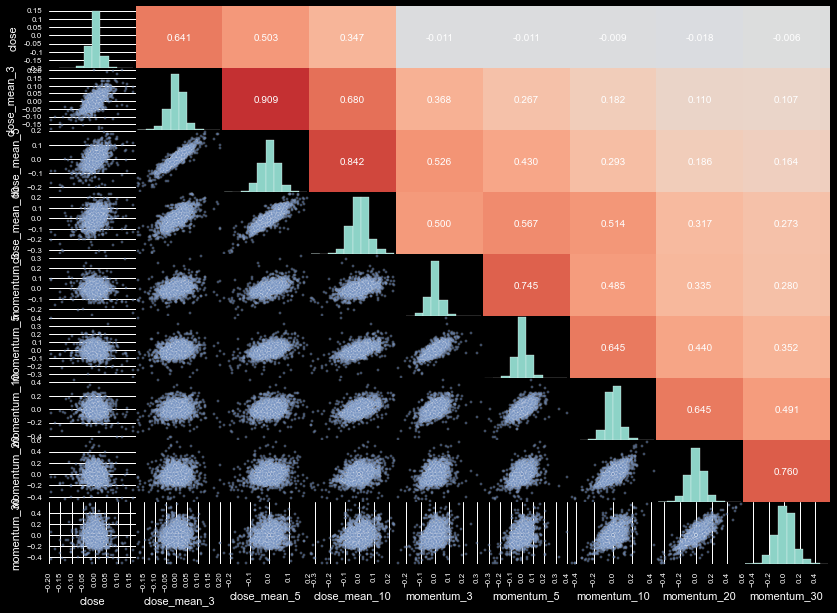

In [18]:
dv.corr_plot( foobar )

In [19]:
print moms.corrwith( bar['close']         )
print moms.corrwith( bar['close_mean_3']  )
print moms.corrwith( bar['close_mean_5']  )
print moms.corrwith( bar['close_mean_10'] )

momentum_3    -0.039888
momentum_5    -0.071812
momentum_10   -0.039149
momentum_20   -0.040569
momentum_30   -0.025183
dtype: float64
momentum_3     0.351498
momentum_5     0.238175
momentum_10    0.175237
momentum_20    0.100499
momentum_30    0.106118
dtype: float64
momentum_3     0.525389
momentum_5     0.420953
momentum_10    0.307591
momentum_20    0.185516
momentum_30    0.180940
dtype: float64
momentum_3     0.491050
momentum_5     0.562824
momentum_10    0.531307
momentum_20    0.341696
momentum_30    0.304728
dtype: float64


In [20]:
# Momentum 3 5 and 10 do decent job

In [21]:
foobar = bar.join( rsi, how='inner' )

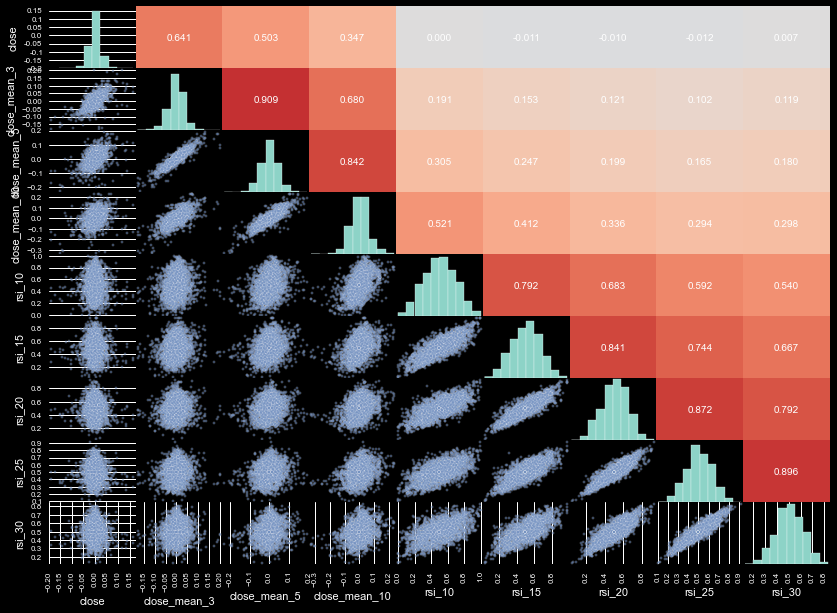

In [22]:
dv.corr_plot( foobar )

In [23]:
print rsi.corrwith( bar['close']         )
print rsi.corrwith( bar['close_mean_3']  )
print rsi.corrwith( bar['close_mean_5']  )
print rsi.corrwith( bar['close_mean_10'] )

rsi_10   -0.004802
rsi_15   -0.011101
rsi_20   -0.013457
rsi_25   -0.014230
rsi_30   -0.003457
dtype: float64
rsi_10    0.179288
rsi_15    0.150743
rsi_20    0.114164
rsi_25    0.103768
rsi_30    0.114502
dtype: float64
rsi_10    0.299418
rsi_15    0.250824
rsi_20    0.197205
rsi_25    0.176970
rsi_30    0.186119
dtype: float64
rsi_10    0.504031
rsi_15    0.408871
rsi_20    0.340264
rsi_25    0.309068
rsi_30    0.306633
dtype: float64


In [24]:
# RSI 10, 15 good

In [25]:
foobar = bar.join( bands, how='inner' )

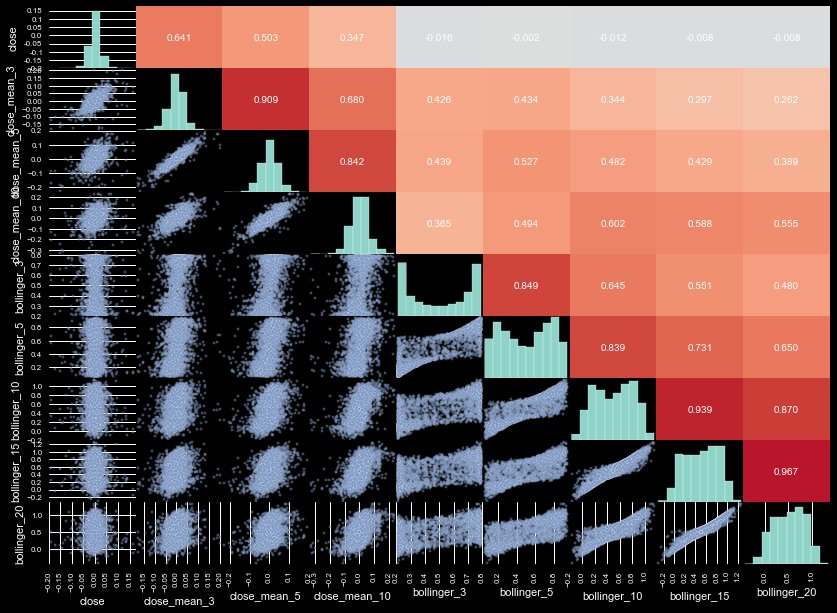

In [26]:
dv.corr_plot( foobar )

In [27]:
print bands.corrwith( bar['close']         )
print bands.corrwith( bar['close_mean_3']  )
print bands.corrwith( bar['close_mean_5']  )
print bands.corrwith( bar['close_mean_10'] )

bollinger_3    -0.015163
bollinger_5    -0.007768
bollinger_10   -0.019000
bollinger_15   -0.013668
bollinger_20   -0.010985
dtype: float64
bollinger_3     0.402194
bollinger_5     0.395218
bollinger_10    0.316326
bollinger_15    0.278441
bollinger_20    0.252692
dtype: float64
bollinger_3     0.422634
bollinger_5     0.495958
bollinger_10    0.457141
bollinger_15    0.415466
bollinger_20    0.386257
dtype: float64
bollinger_3     0.353149
bollinger_5     0.465438
bollinger_10    0.569770
bollinger_15    0.566306
bollinger_20    0.546843
dtype: float64


In [128]:
# bollinger_3, 5, 10, 15 - all good for predictive means around that number of days